In [1]:
import pandas as pd
import numpy as np
import random 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import gridspec

# Heatmap -- Sim1 -- 100 Nodes

In [2]:
NumSim = 1

In [3]:
df_heatmap = pd.DataFrame(np.nan, index=("0.25", "0.5", "0.75", "Uniform", "Function"), 
                                 columns= ("Simulation1", "Simulation2", "Simulation2"))

In [4]:
df_heatmap

,Simulation1,Simulation2,Simulation2
0.25,NaN,NaN,NaN
0.5,NaN,NaN,NaN
0.75,NaN,NaN,NaN
Uniform,NaN,NaN,NaN
Function,NaN,NaN,NaN


## alpha = 0.25

In [5]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.25
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 2000 
N = 100
Z = 4 
P = 4

In [6]:
for k in range(0, NumSim):
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)

    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)

    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z))

    for i in range(0, N + Z):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    for w in range(0, Z): 
        weight_list.append(4)
    
    i = 0 

    while(i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    

0 - Initial Extremists: 0.038461538461538464
0 - End Extremists: 0.8653846153846154


In [7]:
df_heatmap.loc["0.25", "Simulation1"] = extremists

## alpha = 0.5

In [8]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 2000 
N = 100
Z = 4 
P = 4

In [9]:
for k in range(0, NumSim):
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)

    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)

    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z))

    for i in range(0, N + Z):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    for w in range(0, Z): 
        weight_list.append(4)
    
    i = 0 

    while(i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    

0 - Initial Extremists: 0.10576923076923077
0 - End Extremists: 0.9903846153846154


In [10]:
df_heatmap.loc["0.5", "Simulation1"] = extremists

## alpha = 0.75

In [11]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.75
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 2000 
N = 100
Z = 4 
P = 4

In [12]:
for k in range(0, NumSim):
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)

    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)

    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z))

    for i in range(0, N + Z):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    for w in range(0, Z): 
        weight_list.append(4)
    
    i = 0 

    while(i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)

0 - Initial Extremists: 0.11538461538461539
0 - End Extremists: 1.0


In [13]:
df_heatmap.loc["0.75", "Simulation1"] = extremists

## alpha = Uniform[0,1]

In [14]:
class Suspectible: 
    def __init__(self, opinion, alpha): 
        self.opinion = opinion
        self.alpha = alpha
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
#alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 2000 
N = 100
Z = 4 
P = 4

In [15]:
for k in range(0, NumSim):
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)

    for i in range(0, N): 
        n = Suspectible(opinion = round(np.random.normal(loc = 0.5, scale = 0.15), 2), alpha = round(np.random.uniform(0,1),2))
        population.append(n)

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)

    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z))

    for i in range(0, N + Z):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    for w in range(0, Z): 
        weight_list.append(4)
    
    i = 0 

    while(i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + sample_nodes[1].alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + sample_nodes[0].alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + sample_nodes[1].alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + sample_nodes[0].alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + sample_nodes[1].alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + sample_nodes[0].alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + sample_nodes[1].alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + sample_nodes[0].alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    

0 - Initial Extremists: 0.11538461538461539
0 - End Extremists: 0.8557692307692307


In [16]:
df_heatmap.loc["Uniform", "Simulation1"] = extremists

## alpha = Function [Starting Point: Opinions Uniform]

In [17]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
#alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 2000 
N = 100
Z = 4 
P = 4

In [18]:
def alpha_function(opinion_input):
    alpha_output = -((2 * opinion_input) - 1)**2 + 1

    if alpha_output == 1:
        alpha_output = 0.99 

    if alpha_output == 0: 
        alpha_output = 0.1

    return alpha_output 


In [19]:
for k in range(0, NumSim):
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)

    for i in range(0, N): 
        n = Suspectible(opinion = round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)

    ## Data Frame for graphing 
    df_function = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z))

    for i in range(0, N + Z):
        df_function.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df_function.iloc[0,] >= .8) + sum(df_function.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    for w in range(0, Z): 
        weight_list.append(4)
    
    i = 0 

    while(i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                alpha_adjusted = round(alpha_function(sample_nodes[1].opinion),2)
                sample_nodes[1].opinion = n1_opinion + alpha_adjusted * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                alpha_adjusted = round(alpha_function(sample_nodes[0].opinion),2)
                sample_nodes[0].opinion = n0_opinion + alpha_adjusted * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                alpha_adjusted = round(alpha_function(sample_nodes[1].opinion),2)
                sample_nodes[1].opinion = n1_opinion + alpha_adjusted * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                alpha_adjusted = round(alpha_function(sample_nodes[0].opinion),2)
                sample_nodes[0].opinion = n0_opinion + alpha_adjusted * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                alpha_adjusted = round(alpha_function(sample_nodes[1].opinion),2)
                sample_nodes[1].opinion = n1_opinion + alpha_adjusted * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                alpha_adjusted = round(alpha_function(sample_nodes[0].opinion),2)
                sample_nodes[0].opinion = n0_opinion + alpha_adjusted * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            alpha_adjusted_0 = round(alpha_function(sample_nodes[0].opinion),2)
            alpha_adjusted_1 = round(alpha_function(sample_nodes[1].opinion),2)
            sample_nodes[0].opinion = n0_opinion + alpha_adjusted_0 * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha_adjusted_1 * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df_function.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df_function.iloc[i,] >= .8) + sum(df_function.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    

0 - Initial Extremists: 0.057692307692307696
0 - End Extremists: 0.5096153846153846


In [20]:
df_heatmap.loc["Function", "Simulation1"] = extremists

In [21]:
df_heatmap

,Simulation1,Simulation2,Simulation2
0.25,0.865385,NaN,NaN
0.5,0.990385,NaN,NaN
0.75,1.000000,NaN,NaN
Uniform,0.855769,NaN,NaN
Function,0.509615,NaN,NaN


In [22]:
##df_heatmap.to_excel("Graph2Sim1.xlsx")

# Heatmap -- Sim2 -- 100 Nodes

In [23]:
df_initial_opinions_100 = pd.read_excel("EndOpinions_100.xlsx")
df_initial_opinions_100 = df_initial_opinions_100.drop(columns=['Unnamed: 0'])
df_initial_opinions_100

,1,2,3,4,5,6,7,8,9,10,...,95,96,97,98,99,100,101,102,103,104
0,0.966484,0.063281,0.027588,0.103750,0.076328,0.030371,0.030776,0.965000,0.994077,0.997039,...,0.028750,0.079375,0.755000,0.060742,0.026865,0.011562,1,0,1,0
1,0.029066,0.971602,0.005039,0.947500,0.991523,0.993125,0.981641,0.028281,0.992578,0.045098,...,0.987832,0.999297,0.755000,0.020000,0.994063,0.014766,1,0,1,0
2,0.022485,0.072031,0.970000,0.190000,0.945000,0.021177,0.220000,0.961250,0.029531,0.993945,...,0.988750,0.998594,0.758125,0.051035,0.994687,0.026250,1,0,1,0
3,0.969062,0.995313,0.971875,0.948125,0.056328,0.971797,0.979375,0.948750,0.994512,0.994512,...,0.986250,0.022187,0.021576,0.031328,0.986289,0.986563,1,0,1,0
4,0.026582,0.046875,0.971250,0.968750,0.971016,0.998735,0.980488,0.030000,0.983281,0.011318,...,0.023750,0.076172,0.875000,0.026250,0.995469,0.985625,1,0,1,0


## alpha = 0.25

In [24]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.25
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 2000 
N = 100
Z = 4 
P = 4

In [25]:
for k in range(0, NumSim):
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        opinion = df_initial_opinions_100.iloc[k,i]
        n = Suspectible(opinion)
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(40)
    
    i = 0 

    print("Going into while", k)
    while(i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    

0 - Initial Extremists: 0.9519230769230769
Going into while 0
0 - End Extremists: 0.4230769230769231


In [26]:
df_heatmap.loc["0.25", "Simulation2"] = extremists

## alpha = 0.5

In [27]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 2000 
N = 100
Z = 4 
P = 4

In [28]:
for k in range(0, NumSim):
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        opinion = df_initial_opinions_100.iloc[k,i]
        n = Suspectible(opinion)
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(40)
    
    i = 0 

    print("Going into while", k)
    while(i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    

0 - Initial Extremists: 0.9519230769230769
Going into while 0
0 - End Extremists: 0.20192307692307693


In [29]:
df_heatmap.loc["0.5", "Simulation2"] = extremists

## alpha = 0.75

In [30]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 2000 
N = 100
Z = 4 
P = 4

In [31]:
for k in range(0, NumSim):
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        opinion = df_initial_opinions_100.iloc[k,i]
        n = Suspectible(opinion)
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(40)
    
    i = 0 

    print("Going into while", k)
    while(i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)

0 - Initial Extremists: 0.9519230769230769
Going into while 0
0 - End Extremists: 0.20192307692307693


In [32]:
df_heatmap.loc["0.75", "Simulation2"] = extremists

## alpha = Uniform[0,1]

In [33]:
class Suspectible: 
    def __init__(self, opinion, alpha): 
        self.opinion = opinion
        self.alpha = alpha
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
#alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 2000 
N = 100
Z = 4 
P = 4

In [34]:
for k in range(0, NumSim):
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        opinion = df_initial_opinions_100.iloc[k,i]
        n = Suspectible(opinion, alpha = round(np.random.uniform(0,1),2))
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(40)
    
    i = 0 

    print("Going into while", k)
    while(i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + sample_nodes[1].alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + sample_nodes[0].alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + sample_nodes[1].alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + sample_nodes[0].alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers) == False):
                sample_nodes[1].opinion = n1_opinion + sample_nodes[1].alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)and isinstance(sample_nodes[0], PeaceMakers) == False):
                sample_nodes[0].opinion = n0_opinion + sample_nodes[0].alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and 
            isinstance(sample_nodes[0], PeaceMakers) == False 
            and isinstance(sample_nodes[1], PeaceMakers) == False 
            and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + sample_nodes[0].alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + sample_nodes[1].alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)

0 - Initial Extremists: 0.9519230769230769
Going into while 0
0 - End Extremists: 0.28846153846153844


In [35]:
df_heatmap.loc["Uniform", "Simulation2"] = extremists

## alpha = Function [Starting Point: Opinions Uniform]

In [36]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
#alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 2000 
N = 100
Z = 4 
P = 4

In [37]:
def alpha_function(opinion_input):
    alpha_output = -((2 * opinion_input) - 1)**2 + 1

    if alpha_output == 1:
        alpha_output = 0.99 

    if alpha_output == 0: 
        alpha_output = 0.1

    return alpha_output 

In [38]:
for k in range(0, NumSim):
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        opinion = df_initial_opinions_100.iloc[k,i]
        n = Suspectible(opinion)
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(40)
    
    i = 0 

    print("Going into while", k)
    while(i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                alpha_adjusted = round(alpha_function(sample_nodes[1].opinion),2)
                sample_nodes[1].opinion = n1_opinion + alpha_adjusted * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                alpha_adjusted = round(alpha_function(sample_nodes[0].opinion),2)
                sample_nodes[0].opinion = n0_opinion + alpha_adjusted * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                alpha_adjusted = round(alpha_function(sample_nodes[1].opinion),2)
                sample_nodes[1].opinion = n1_opinion + alpha_adjusted * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                alpha_adjusted = round(alpha_function(sample_nodes[0].opinion),2)
                sample_nodes[0].opinion = n0_opinion + alpha_adjusted * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                alpha_adjusted = round(alpha_function(sample_nodes[1].opinion),2)
                sample_nodes[1].opinion = n1_opinion + alpha_adjusted * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                alpha_adjusted = round(alpha_function(sample_nodes[0].opinion),2)
                sample_nodes[0].opinion = alpha_adjusted + alpha_adjusted * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            alpha_adjusted_0 = round(alpha_function(sample_nodes[0].opinion),2)
            alpha_adjusted_1 = round(alpha_function(sample_nodes[1].opinion),2)
            sample_nodes[0].opinion = n0_opinion + alpha_adjusted_0 * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha_adjusted_1 * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)

0 - Initial Extremists: 0.9519230769230769
Going into while 0


<ipython-input-38-13be8b72a66a>:128: RuntimeWarning: invalid value encountered in double_scalars
  if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):


0 - End Extremists: 0.11538461538461539


In [39]:
df_heatmap.loc["Function", "Simulation2"] = extremists

In [40]:
df_heatmap

,Simulation1,Simulation2,Simulation2
0.25,0.865385,0.423077,0.423077
0.5,0.990385,0.201923,0.201923
0.75,1.000000,0.201923,0.201923
Uniform,0.855769,0.288462,0.288462
Function,0.509615,0.115385,0.115385


# Heatmap -- Sim3 -- 100 Nodes

## alpha = 0.25

In [41]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.25
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 2000
N = 100
Z = 4 
P = 4

In [42]:
for k in range(0, NumSim):
    
     ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z + P)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(6)
        
    i = 0 

    print("Going into while", k)
    while(i < t_max):

    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
        ## Peacemaker only 
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and 
            one_peacemaker == False and both_peacemakers == False and 
            (sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z + P):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z + P)
        i = i+1 
    
    ## Checking 
    print(k, "- End Extremists:", extremists)

0 - Initial Extremists: 0.08333333333333333
Going into while 0
0 - End Extremists: 0.07407407407407407


In [43]:
df_heatmap.loc["0.25", "Simulation3"] = extremists

## alpha = 0.5

In [44]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 2000
N = 100
Z = 4 
P = 4

In [45]:
for k in range(0, NumSim):
    
     ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z + P)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(6)
        
    i = 0 

    print("Going into while", k)
    while(i < t_max):

    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
        ## Peacemaker only 
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and 
            one_peacemaker == False and both_peacemakers == False and 
            (sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z + P):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z + P)
        i = i+1 
    
    ## Checking 
    print(k, "- End Extremists:", extremists)

0 - Initial Extremists: 0.1111111111111111
Going into while 0
0 - End Extremists: 0.14814814814814814


In [46]:
df_heatmap.loc["0.5", "Simulation3"] = extremists

## alpha = 0.75

In [47]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.75
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 2000
N = 100
Z = 4 
P = 4

In [48]:
for k in range(0, NumSim):
    
     ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z + P)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(6)
        
    i = 0 

    print("Going into while", k)
    while(i < t_max):

    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
        ## Peacemaker only 
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and 
            one_peacemaker == False and both_peacemakers == False and 
            (sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z + P):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z + P)
        i = i+1 
    
    ## Checking 
    print(k, "- End Extremists:", extremists)

0 - Initial Extremists: 0.06481481481481481
Going into while 0
0 - End Extremists: 0.18518518518518517


In [49]:
df_heatmap.loc["0.75", "Simulation3"] = extremists

## alpha = Uniform[0,1]

In [50]:
class Suspectible: 
    def __init__(self, opinion, alpha): 
        self.opinion = opinion
        self.alpha = alpha
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
#alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 2000 
N = 100
Z = 4 
P = 4

In [51]:
for k in range(0, NumSim):
    
     ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2), alpha = round(np.random.uniform(0,1),2))
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z + P)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(6)
        
    i = 0 

    print("Going into while", k)
    while(i < t_max):

    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + sample_nodes[1].alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + sample_nodes[0].alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + sample_nodes[1].alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + sample_nodes[0].alpha * (n1_opinion - n0_opinion)
    
        ## Peacemaker only 
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers) == False):
                sample_nodes[1].opinion = n1_opinion + sample_nodes[1].alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers) and isinstance(sample_nodes[0], PeaceMakers) == False):
                sample_nodes[0].opinion = n0_opinion + sample_nodes[0].alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and 
            one_peacemaker == False and both_peacemakers == False and 
            (sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + sample_nodes[1].alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + sample_nodes[0].alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z + P):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z + P)
        i = i+1 
    
    ## Checking 
    print(k, "- End Extremists:", extremists)

0 - Initial Extremists: 0.08333333333333333
Going into while 0
0 - End Extremists: 0.1388888888888889


In [52]:
df_heatmap.loc["Uniform", "Simulation3"] = extremists

## alpha = Function [Starting Point: Opinions Uniform]

In [53]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
#alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 2000 
N = 100
Z = 4 
P = 4

In [54]:
def alpha_function(opinion_input):
    alpha_output = -((2 * opinion_input) - 1)**2 + 1

    if alpha_output == 1:
        alpha_output = 0.99 

    if alpha_output == 0: 
        alpha_output = 0.1

    return alpha_output 

In [55]:
for k in range(0, NumSim):
    
     ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z + P)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(6)
        
    i = 0 

    print("Going into while", k)
    while(i < t_max):

    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                alpha_adjusted = round(alpha_function(sample_nodes[1].opinion),2)
                sample_nodes[1].opinion = n1_opinion + alpha_adjusted * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                alpha_adjusted = round(alpha_function(sample_nodes[0].opinion),2)
                sample_nodes[0].opinion = n0_opinion + alpha_adjusted * (n1_opinion - n0_opinion)
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                alpha_adjusted = round(alpha_function(sample_nodes[1].opinion),2)
                sample_nodes[1].opinion = n1_opinion + alpha_adjusted * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                alpha_adjusted = round(alpha_function(sample_nodes[0].opinion),2)
                sample_nodes[0].opinion = n0_opinion + alpha_adjusted * (n1_opinion - n0_opinion)
    
        ## Peacemaker only 
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers) == False):
                alpha_adjusted = round(alpha_function(sample_nodes[1].opinion),2)
                sample_nodes[1].opinion = n1_opinion + alpha_adjusted * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers) and isinstance(sample_nodes[0], PeaceMakers) == False):
                alpha_adjusted = round(alpha_function(sample_nodes[0].opinion),2)
                sample_nodes[0].opinion = n0_opinion + alpha_adjusted * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and 
            one_peacemaker == False and both_peacemakers == False and 
            (sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
                alpha_adjusted_0 = round(alpha_function(sample_nodes[0].opinion),2)
                alpha_adjusted_1 = round(alpha_function(sample_nodes[1].opinion),2)
                sample_nodes[0].opinion = n0_opinion + alpha_adjusted_0 * (n1_opinion - n0_opinion)
                sample_nodes[1].opinion = n1_opinion + alpha_adjusted_1 * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z + P):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z + P)
        i = i+1 
    
    ## Checking 
    print(k, "- End Extremists:", extremists)

0 - Initial Extremists: 0.09259259259259259
Going into while 0
0 - End Extremists: 0.037037037037037035


In [56]:
df_heatmap.loc["Function", "Simulation3"] = extremists

In [57]:
df_heatmap

,Simulation1,Simulation2,Simulation2,Simulation3
0.25,0.865385,0.423077,0.423077,0.074074
0.5,0.990385,0.201923,0.201923,0.148148
0.75,1.000000,0.201923,0.201923,0.185185
Uniform,0.855769,0.288462,0.288462,0.138889
Function,0.509615,0.115385,0.115385,0.037037


# Plot

In [58]:
df_heatmap_tidy_pre = df_heatmap
df_heatmap_tidy_pre.columns = ['a','b','c','d']
df_heatmap_tidy = df_heatmap_tidy_pre.drop(columns=['c'])
df_heatmap_tidy.columns = ['Simulation1','Simulation2','Simulation3']
df_heatmap_tidy

,Simulation1,Simulation2,Simulation3
0.25,0.865385,0.423077,0.074074
0.5,0.990385,0.201923,0.148148
0.75,1.000000,0.201923,0.185185
Uniform,0.855769,0.288462,0.138889
Function,0.509615,0.115385,0.037037


In [59]:
# df_heatmap_tidy.to_excel("Graph2_Final.xlsx")

In [60]:
## https://stackoverflow.com/questions/63828091/i-want-to-add-extra-space-between-the-columns-of-matplotlib-heatmap-how-do-i-do
## https://stackoverflow.com/questions/34706845/change-xticklabels-fontsize-of-seaborn-heatmap
## https://stackoverflow.com/questions/37233108/seaborn-change-font-size-of-the-colorbar
## https://stackoverflow.com/questions/48586738/seaborn-heatmap-colorbar-label-font-size

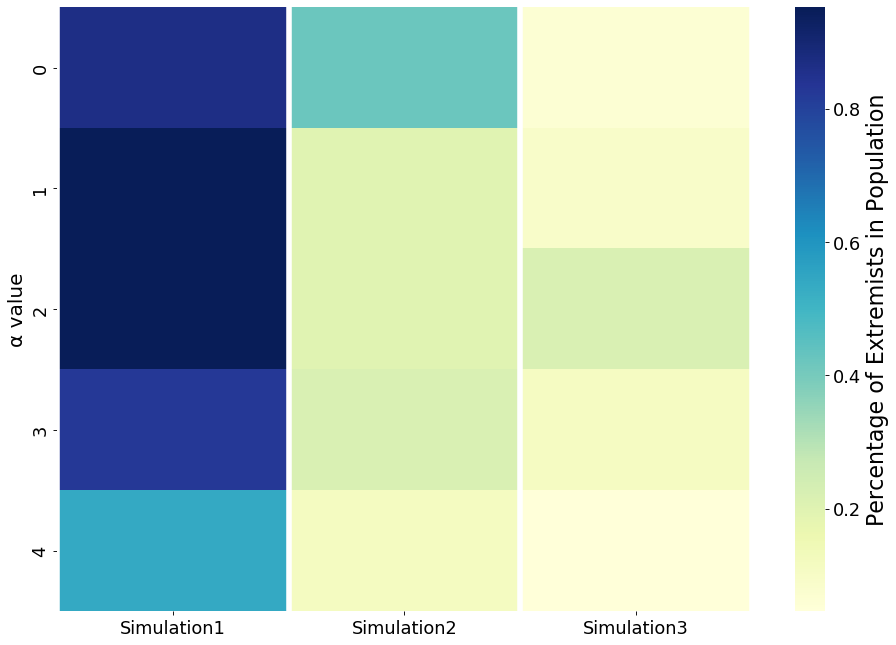

In [68]:
figure(figsize=(14, 10), dpi=80)

ax = sns.heatmap(df_heatmap_tidy, cmap = "YlGnBu", cbar_kws={'label': 'Percentage of Extremists in Population'})

for i in range(df_heatmap_tidy.shape[1] + 1):
    ax.axvline(i, color='white', lw = 5)

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 16)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
ax.figure.axes[-1].yaxis.label.set_size(20)

plt.ylabel('α value', fontsize = 18)

#plt.savefig('Graph2.png')

plt.show()

## Additional Graph Exploring the Function

In [62]:
df_function

,1,2,3,4,5,6,7,8,9,10,...,95,96,97,98,99,100,101,102,103,104
0,0.630000,0.360000,0.590000,0.51000,0.540000,0.610000,0.660000,0.270000,0.360000,0.570000,...,0.270000,0.480000,0.620000,0.520000,0.300000,0.360000,1.0,0.0,1.0,0.0
1,0.630000,0.360000,0.590000,0.51000,0.540000,0.610000,0.660000,0.270000,0.360000,0.570000,...,0.270000,0.480000,0.620000,0.520000,0.300000,0.360000,1.0,0.0,1.0,0.0
2,0.630000,0.360000,0.590000,0.51000,0.540000,0.610000,0.660000,0.270000,0.360000,0.570000,...,0.270000,0.480000,0.620000,0.520000,0.300000,0.360000,1.0,0.0,1.0,0.0
3,0.630000,0.360000,0.590000,0.51000,0.540000,0.610000,0.660000,0.270000,0.360000,0.570000,...,0.270000,0.480000,0.620000,0.520000,0.300000,0.360000,1.0,0.0,1.0,0.0
4,0.630000,0.360000,0.590000,0.51000,0.540000,0.610000,0.660000,0.270000,0.360000,0.570000,...,0.270000,0.480000,0.620000,0.520000,0.300000,0.360000,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,0.828172,0.269136,0.805059,0.65183,0.746293,0.914145,0.902962,0.086418,0.086142,0.286624,...,0.086418,0.348682,0.699154,0.601912,0.202019,0.132159,1.0,0.0,1.0,0.0
1997,0.828172,0.269136,0.805059,0.65183,0.746293,0.914145,0.902962,0.086418,0.086142,0.286624,...,0.086418,0.348682,0.699154,0.601912,0.202019,0.132159,1.0,0.0,1.0,0.0
1998,0.828172,0.269136,0.805059,0.65183,0.746293,0.914145,0.902962,0.086418,0.086142,0.286624,...,0.086418,0.348682,0.699154,0.601912,0.202019,0.132159,1.0,0.0,1.0,0.0
1999,0.828172,0.269136,0.805059,0.65183,0.746293,0.914145,0.902962,0.086418,0.086142,0.286624,...,0.086418,0.348682,0.699154,0.601912,0.202019,0.132159,1.0,0.0,1.0,0.0


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

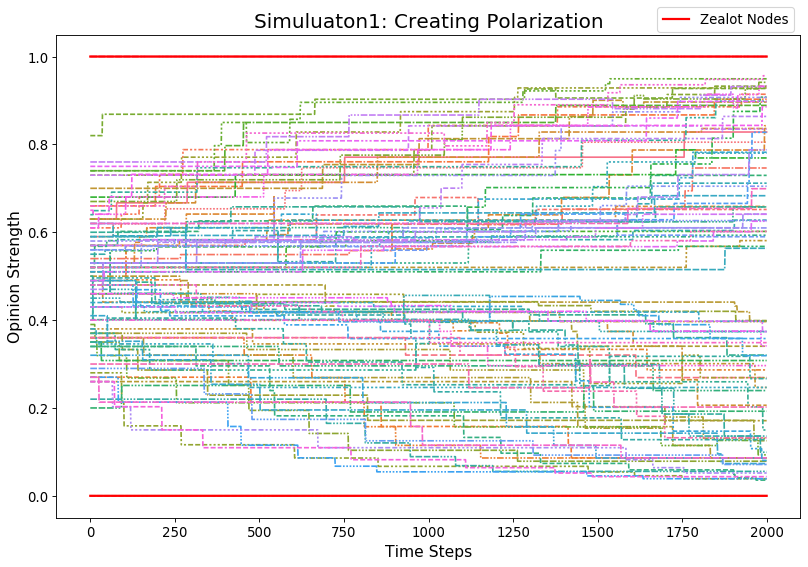

In [63]:
## (width, height)
figure(figsize=(12, 8), dpi=80)

sns.lineplot(data = df_function, legend = None)
plt.plot(df_function[101], linewidth = 2, color = "red", label = "Zealot Nodes")
plt.plot(df_function[102], linewidth = 2, color = "red")
plt.legend(loc="upper right", prop={'size': 12}, bbox_to_anchor=(1, 1.07))


plt.title('Simuluaton1: Creating Polarization', fontsize = 18)
plt.ylabel('Opinion Strength', fontsize = 14)
plt.xlabel('Time Steps', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)